<a href="https://colab.research.google.com/github/Azeemahma/CreditCardFraudDetection/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
data = pd.read_csv("/content/creditcard.csv",sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

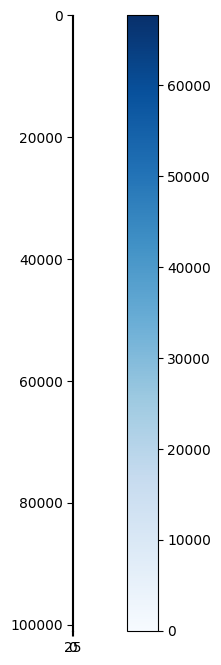

In [3]:
plt.imshow(data, cmap = 'Blues')
plt.colorbar()
plt.show

In [5]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]
print(fraud.shape,normal.shape)

(224, 31) (100880, 31)


In [6]:
data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(10110, 31)

In [7]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(10110, 30)
(10110,)


(3, 31) (5970, 31)
(597, 30)
(597,)
Isolation Forest: 2
Accuracy Score :
Confusion Matrix :
[[595   1]
 [  1   0]]
0.9966499162479062
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       596
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       597
   macro avg       0.50      0.50      0.50       597
weighted avg       1.00      1.00      1.00       597

Naive Bayes: 1
Accuracy Score :
Confusion Matrix :
[[596   0]
 [  1   0]]
0.998324958123953
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       596
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       597
   macro avg       0.50      0.50      0.50       597
weighted avg       1.00      1.00      1.00       597

Support Vector Machine: 243
Accuracy Score :
Confusion Matrix :
[[354 24

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/l

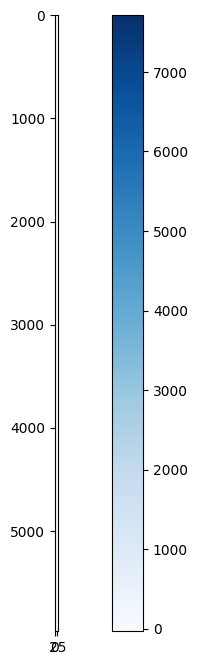

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from pylab import rcParams
from sklearn.metrics import confusion_matrix
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
data = pd.read_csv("/content/creditcard.csv",sep=',')
data.head()
data.isnull().values
#heat map
plt.imshow(data, cmap = 'Blues')
plt.colorbar()
plt.show
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]
print(fraud.shape,normal.shape)
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
##Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1),
    "Logistic Regression": LogisticRegression()
}
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Naive Bayes":
      clf.fit(X, Y)
      y_pred = clf.predict(X)
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    elif clf_name == "Logistic Regression":
        clf.fit(X, Y)  # Fit the Logistic Regression model
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print("Confusion Matrix :")
    print(confusion_matrix(Y, y_pred))
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(250, 31) (122630, 31)
(12288, 30)
(12288,)
Isolation Forest: 15
Accuracy Score :
0.998779296875
Confusion Matrix :
[[12266     8]
 [    7     7]]
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12274
         1.0       0.47      0.50      0.48        14

    accuracy                           1.00     12288
   macro avg       0.73      0.75      0.74     12288
weighted avg       1.00      1.00      1.00     12288

Naive Bayes: 14
Accuracy Score :
0.9988606770833334
Confusion Matrix :
[[12274     0]
 [   14     0]]
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12274
         1.0       0.00      0.00      0.00        14

    accuracy                           1.00     12288
   macro avg       0.50      0.50      0.50     12288
weighted avg       1.00      1.00      1.00     12288



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine: 3913
Accuracy Score :
0.6815592447916666
Confusion Matrix :
[[8371 3903]
 [  10    4]]
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     12274
         1.0       0.00      0.29      0.00        14

    accuracy                           0.68     12288
   macro avg       0.50      0.48      0.41     12288
weighted avg       1.00      0.68      0.81     12288

Logistic Regression: 14
Accuracy Score :
0.9988606770833334
Confusion Matrix :
[[12274     0]
 [   14     0]]
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12274
         1.0       0.00      0.00      0.00        14

    accuracy                           1.00     12288
   macro avg       0.50      0.50      0.50     12288
weighted avg       1.00      1.00      1.00     12288



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

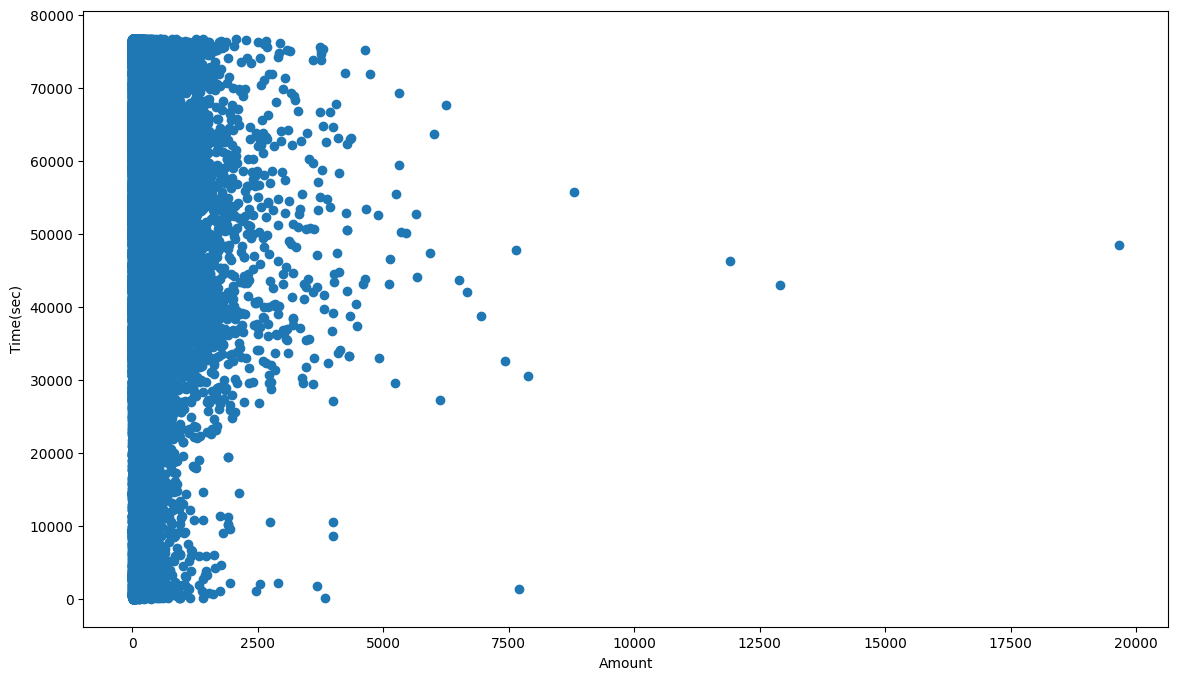

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from pylab import rcParams
from sklearn.metrics import confusion_matrix
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
data = pd.read_csv("/content/creditcard.csv",sep=',')
data.head()
data.isnull().values
#Scatter Plot
plt.scatter(data["Amount"],data["Time"])
plt.xlabel("Amount")
plt.ylabel("Time(sec)")
plt.show
## Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]
print(fraud.shape,normal.shape)
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
##Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1),
    "Logistic Regression": LogisticRegression()
}
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Naive Bayes":
      clf.fit(X, Y)
      y_pred = clf.predict(X)
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    elif clf_name == "Logistic Regression":
        clf.fit(X, Y)  # Fit the Logistic Regression model
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Confusion Matrix :")
    print(confusion_matrix(Y, y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))